In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import statsmodels.api as sm

# Đọc file Excel
data_train_p1 = pd.read_excel(io.BytesIO(uploaded['Data_Train_p1.xlsx']))
data_train_p2 = pd.read_excel(io.BytesIO(uploaded['Data_Train_p2.xlsx']))


# Kết hợp hai data set
data = pd.concat([data_train_p1, data_train_p2])

#Quan sát và phân tích tập dữ liệu (EDA)

#### **1. Cho biết kiểu dữ liệu của các thuộc tính:**

In [ ]:
print("Kiểu dữ liệu của các thuộc tính:")
print(data.dtypes)

Kiểu dữ liệu của các thuộc tính:
Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


#### **2. Đối với cột Price, cho biết:**
- Giá cao nhất, thấp nhất, giá trung bình, mức giá xuất hiện nhiều
- Độ lệch chuẩn của cột price?
- Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm? Nhận xét về giá trị mean và median của tập dữ liệu.
- Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?

In [ ]:
# Hiển thị thông tin về cột "Price"
print("Thông tin về cột 'Price':")
print(data['Price'].describe())

# Tìm giá cao nhất
max_price = data['Price'].max()
print(f'\nGiá cao nhất: {max_price}')

# Tìm giá thấp nhất
min_price = data['Price'].min()
print(f'Giá thấp nhất: {min_price}')

# Tính giá trung bình
mean_price = data['Price'].mean()
print(f'Giá trung bình: {mean_price}')

# Tìm mức giá xuất hiện nhiều
mode_price = data['Price'].mode()
print(f'Mức giá xuất hiện nhiều nhất:\n{mode_price}')

Thông tin về cột 'Price':
count    10684.000000
mean      9087.545582
std       4611.411873
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Giá cao nhất: 79512
Giá thấp nhất: 1759
Giá trung bình: 9087.545582178958
Mức giá xuất hiện nhiều nhất:
0    10262
Name: Price, dtype: int64


**Độ lệch chuẩn của cột price?**

In [ ]:
# Tính độ lệch chuẩn của cột "Price"
std_price = data['Price'].std()

print(f"Độ lệch chuẩn của cột 'Price': {std_price}")

Độ lệch chuẩn của cột 'Price': 4611.411872913706


 **Cho biết giá phân phối xung quanh trung tâm hay cách xa trung tâm?**
**Nhận xét về giá trị mean và median của tập dữ liệu.**

In [ ]:
median=data['Price'].median()
mean=data['Price'].mean()
mode=data['Price'].mode()
print("median",median)
print("mean",mean)


median 8372.0
mean 9087.545582178958


ta có median < mean: giá trị phân phối cách xa trung tâm và có một số giá trị lớn ở phần đuôi phải của phân phối

**Vẽ đồ thị histogram để nhận xét dữ liệu có bị lệch không?**

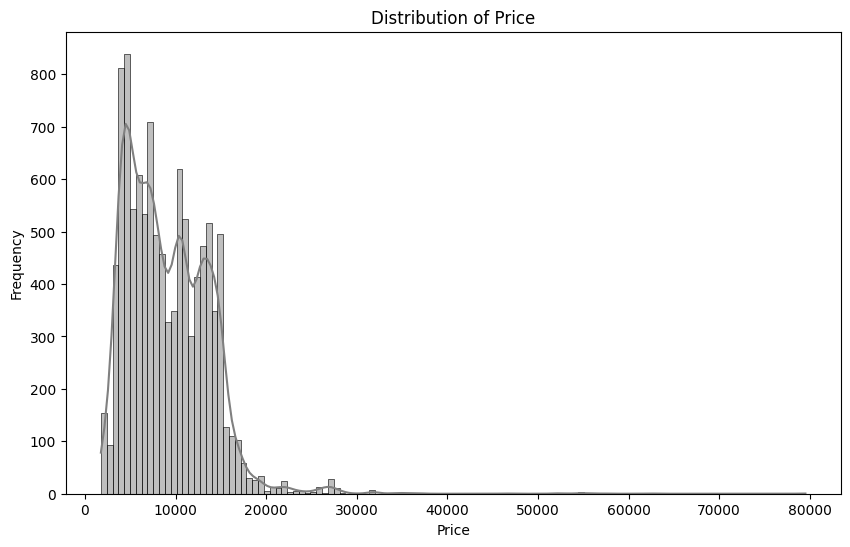

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Price'].dropna(), kde=True, color='gray')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Dư liệu bị lệch về phía bên trái so với phân phối chuẩn

#### **3. Mô tả số lượng missing value của mỗi thuộc tính**

In [ ]:
data.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
dtype: int64

#### **4. Tính tỷ lệ % missing value của mỗi thuộc tính**

In [ ]:

# Tỷ lệ % missing value của mỗi thuộc tính
missingValuePercent = (data.isnull().sum() / len(data))* 100
print(missingValuePercent)

Airline            0.00000
Date_of_Journey    0.00000
Source             0.00000
Destination        0.00000
Route              0.00936
Dep_Time           0.00000
Arrival_Time       0.00000
Duration           0.00000
Total_Stops        0.00936
Additional_Info    0.00000
Price              0.00000
dtype: float64


#### **5. Xử lý dữ liệu missing**

In [ ]:
print("các dòng data có giá trị NAN")
display(data[data['Route'].isnull()])
display(data[data['Total_Stops'].isnull()])
# Xóa các dòng dữ liệu chứa giá trị thiếu
print("Số lượng dòng dữ liệu ban đầu:", len(data))
clean_data = data.dropna(how='any')
data = data.dropna(how='any')

print("chỉ có 1 dòng data bị missing value, do đó ta có thể xóa, không ảnh hướng đến giá trị TB.")
# In số lượng dòng dữ liệu ban đầu và sau khi xóa giá trị thiếu

print("Số lượng dòng dữ liệu sau khi xóa giá trị thiếu:", len(clean_data))

các dòng data có giá trị NAN


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7171,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
7171,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Số lượng dòng dữ liệu ban đầu: 10684
chỉ có 1 dòng data bị missing value, do đó ta có thể xóa, không ảnh hướng đến giá trị TB.
Số lượng dòng dữ liệu sau khi xóa giá trị thiếu: 10683


#### **6. Outlier: sử dụng đồ thị boxplot để quan sát cột Price có tồn tại outlier không?**

In [ ]:
# sns.boxplot(data['Price'])
# plt.show()

# Tính giá trị IQR cho cột Price
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng trên và ngưỡng dưới để xác định outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các dòng có giá vé là outliers
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]


In [ ]:
display(data["Airline"])

0                  IndiGo
1               Air India
2             Jet Airways
3                  IndiGo
4                  IndiGo
              ...        
1864            Air India
1865               IndiGo
1866    Multiple carriers
1867          Jet Airways
1868          Jet Airways
Name: Airline, Length: 10589, dtype: object

#### **7.Chuẩn hóa lại dữ liệu**

In [ ]:

# Chuyển đổi cột 'Date_of_Journey' thành đối tượng datetime
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')
# Chuyển cột "Date_of_Journey" thành định dạng ngày tháng
data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.time
data['Dep_time_minutes'] = data['Dep_Time'].apply(lambda x: x.hour * 60 + x.minute)

data['Hour'] = data['Arrival_Time'].str.split(' ').str[0]
data['Hour'] = pd.to_datetime(data['Hour'], format='%H:%M').dt.time
data['Arr_time_minutes'] = data['Hour'].apply(lambda x: x.hour * 60 + x.minute)

data['Month_of_Journey'] = data['Date_of_Journey'].dt.month
data["Day_of_Journey"] = data["Date_of_Journey"].dt.day
# dùng Label Encoding để chuyển số lượng các điểm dừng chân thafnhcacs number
data["Total_Stops"] = data["Total_Stops"].map({"non-stop":0,"2 stops":2,"1 stop":1,"3 stops":3,"4 stops":4})

data['Duration'] = pd.to_timedelta(data['Duration'])
data['Duration_minutes'] = data['Duration'].dt.total_seconds() / 60

data['Hour_of_Dep_Time'] = data['Dep_Time'].apply(lambda x: int(x.strftime('%H')))

# Visualize dữ liệu dạng bảng hoặc đồ thị

#### **1. Giá vé tăng khi nào?**

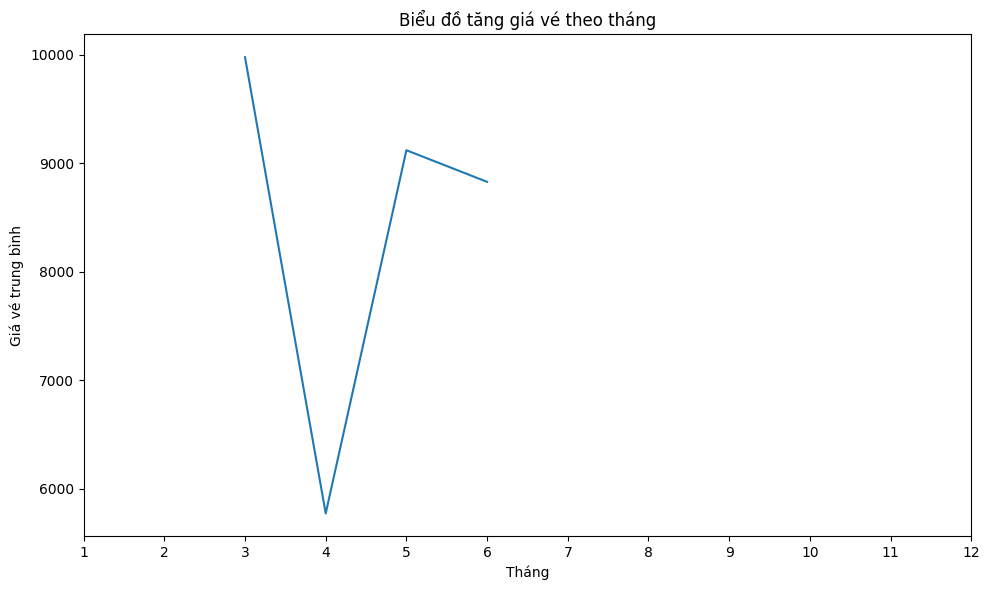

Ta có thể thấy được giá vé tăng mạnh trong khoảng từ tháng 4 đến tháng 5


In [ ]:

# Nhóm dữ liệu theo tháng và tính giá trung bình của từng tháng
average_prices = data.groupby('Month_of_Journey')['Price'].mean()

# Vẽ biểu đồ tăng giá vé theo tháng
plt.figure(figsize=(10, 6))
plt.plot(average_prices.index, average_prices.values)
plt.xlabel('Tháng')
plt.ylabel('Giá vé trung bình')
plt.title('Biểu đồ tăng giá vé theo tháng')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

print("Ta có thể thấy được giá vé tăng mạnh trong khoảng từ tháng 4 đến tháng 5")

#### **2. So sánh tỷ lệ các chuyến bay thẳng và trung chuyển (có dừng)**

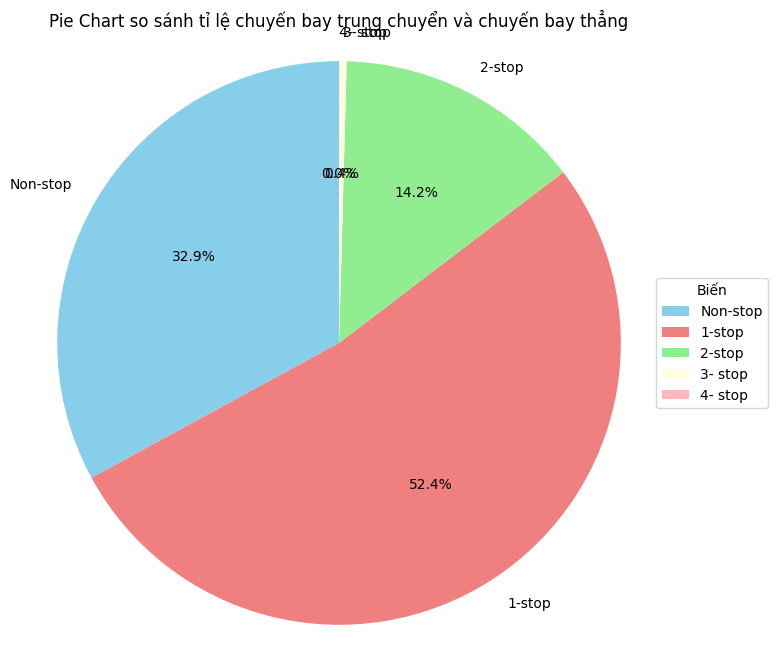

In [ ]:
label = ['Non-stop', '1-stop', '2-stop', '3- stop', '4- stop']
total_rows = data.shape[0]
non_stop_ratio= data[data['Total_Stops']== 0].shape[0]/ data.shape[0]
one_stop_ratio= data[data['Total_Stops']== 1].shape[0]/ data.shape[0]
two_stop_ratio= data[data['Total_Stops']== 2].shape[0]/ data.shape[0]
three_stop_ratio= data[data['Total_Stops']== 3].shape[0]/ data.shape[0]
four_stop_ratio= data[data['Total_Stops']== 4].shape[0]/ data.shape[0]


sizes=[non_stop_ratio, one_stop_ratio, two_stop_ratio, three_stop_ratio, four_stop_ratio]
# Tạo pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=label, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow', 'lightpink'])
plt.title('Pie Chart so sánh tỉ lệ chuyến bay trung chuyển và chuyến bay thẳng')
plt.axis('equal')  # Để giữ cho hình tròn

# Thêm legend
plt.legend(label, title="Biến", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()



#### **3. Thành phố nào có lượng chuyến bay đến/đi nhiều nhất?**

Delhi        5785
Banglore     4996
Cochin       4520
Kolkata      3252
New Delhi     860
Mumbai        692
Hyderabad     692
Chennai       381
dtype: int64


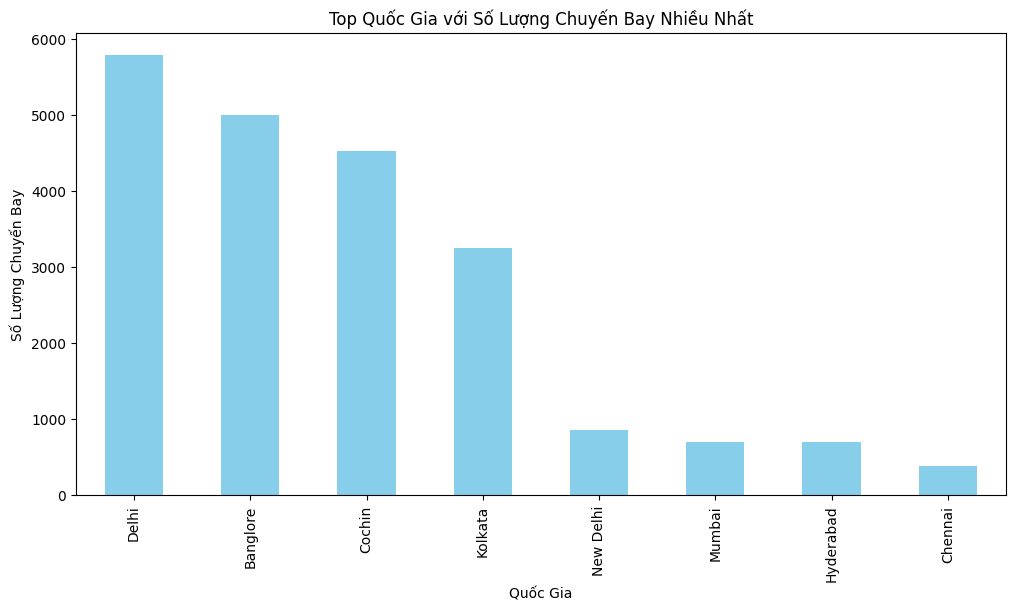

In [ ]:
countries = pd.concat([data['Source'], data['Destination']])
flight_counts = countries.value_counts()
top_countries = flight_counts.head(10)
print(top_countries)
# Vẽ biểu đồ thanh
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top Quốc Gia với Số Lượng Chuyến Bay Nhiều Nhất')
plt.xlabel('Quốc Gia')
plt.ylabel('Số Lượng Chuyến Bay')
plt.show()

#### **4. Hãng máy bay nào được khách đặt vé nhiều/thấp nhất?**

Jet Airways                          3788
IndiGo                               2053
Air India                            1736
Multiple carriers                    1186
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


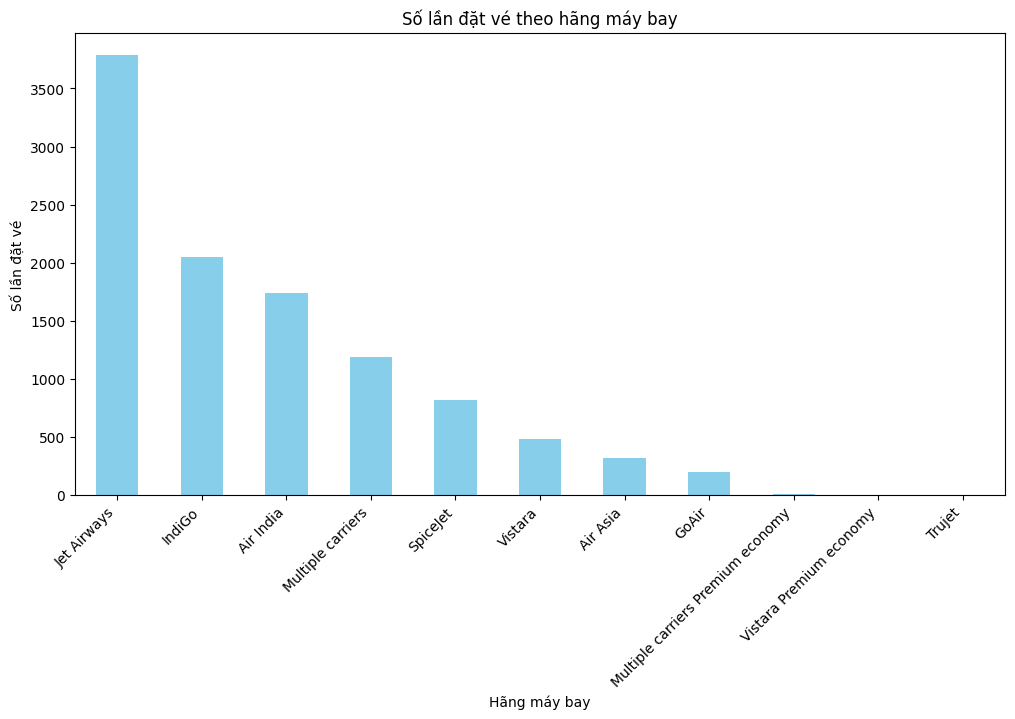

In [ ]:
# Tính số lần đặt vé của mỗi hãng máy bay
airline_counts = data['Airline'].value_counts()
print(airline_counts)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
airline_counts.plot(kind='bar', color='skyblue')
plt.title('Số lần đặt vé theo hãng máy bay')
plt.xlabel('Hãng máy bay')
plt.ylabel('Số lần đặt vé')
plt.xticks(rotation=45, ha='right')
plt.show()

Qua biểu đồ cho thấy:


*   Hãng máy bay được khách đặt vé nhiều nhất là: Jet Airways với tổng số lần đặt là 3850 lần.
*   Hãng máy bay được khách đặt vé thấp nhất là: Trujet với tổng số lần đặt là 1 lần.



#### **5. Tháng nào là tháng cao điểm**

3    2632
4    1079
5    3464
6    3414
Name: Month_of_Journey, dtype: int64


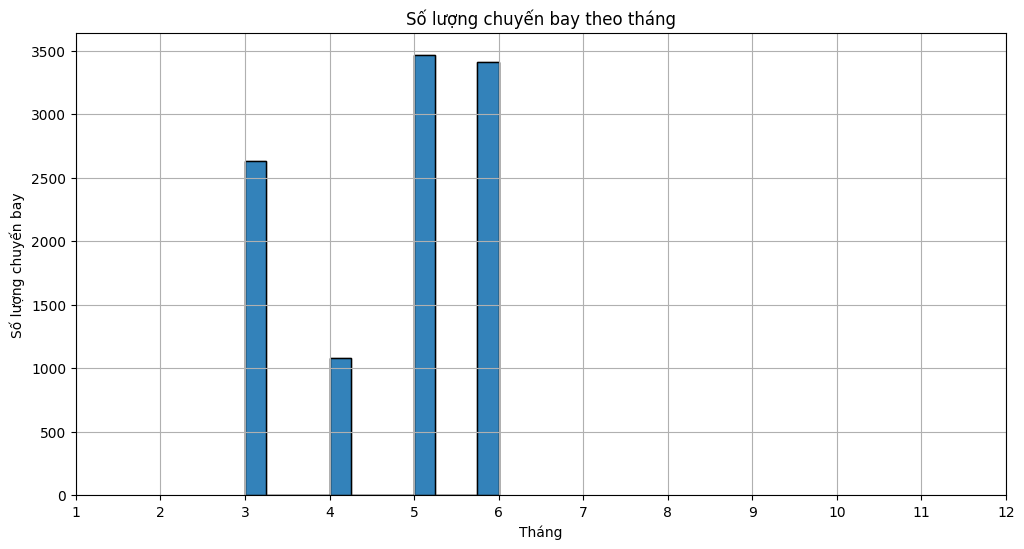

số lượng chuyến bay không đồng đều , cao điểm nhất là tháng 5 với gần 3500 chuyến và ngay sát sau là tháng 6


In [ ]:
# Số lượng chuyến bay theo tháng
flight_counts = data['Month_of_Journey'].value_counts().sort_index()

print (flight_counts)
# Trực quan hóa số lượng chuyến bay theo tháng bằng histogram
plt.figure(figsize=(12, 6))

plt.grid(True)
plt.hist(data['Month_of_Journey'], bins=12, edgecolor='black', alpha=0.7)
sns.histplot(data=data, x='Month_of_Journey', bins=12, edgecolor='black', alpha=0.7)
plt.xlabel('Tháng')
plt.ylabel('Số lượng chuyến bay')
plt.title('Số lượng chuyến bay theo tháng')
plt.xticks(range(1, 13))

plt.show()



print("số lượng chuyến bay không đồng đều , cao điểm nhất là tháng 5 với gần 3500 chuyến và ngay sát sau là tháng 6")

#### **6. Giá có thay đổi tùy theo hãng hàng không hay không?**

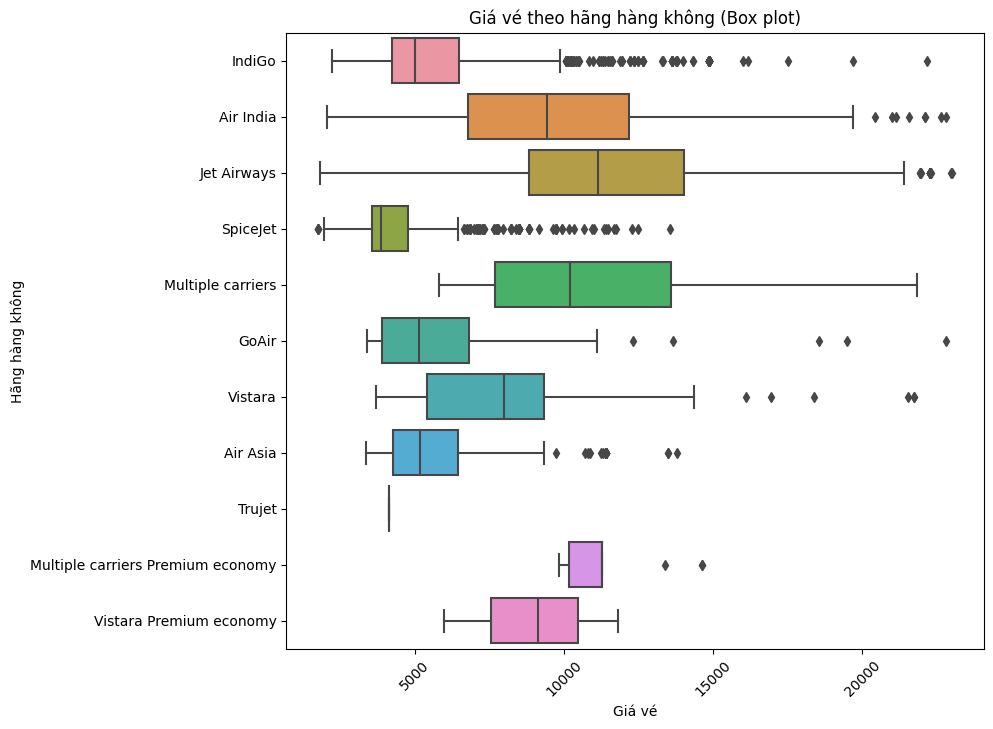

Giá vé có sự thay đổi giữa các hãng hàng không, cao nhất là jet Ariways và thấp nhất là  spicejet và truiet 


In [ ]:
df = data
plt.figure(figsize=(9, 8))
sns.boxplot(data=df, y='Airline', x='Price')
plt.xlabel('Giá vé')
plt.ylabel('Hãng hàng không')
plt.title('Giá vé theo hãng hàng không (Box plot)')
plt.xticks(rotation=45)
plt.show()


print("Giá vé có sự thay đổi giữa các hãng hàng không, cao nhất là jet Ariways và thấp nhất là  spicejet và truiet ")

#### **7. Giá vé bị ảnh hưởng như thế nào khi mua vé chỉ 1 hoặc 2 ngày trước ngày khởi hành?**

In [ ]:
df =pd.read_csv('Clean_Dataset.csv')

NameError: name 'pd' is not defined

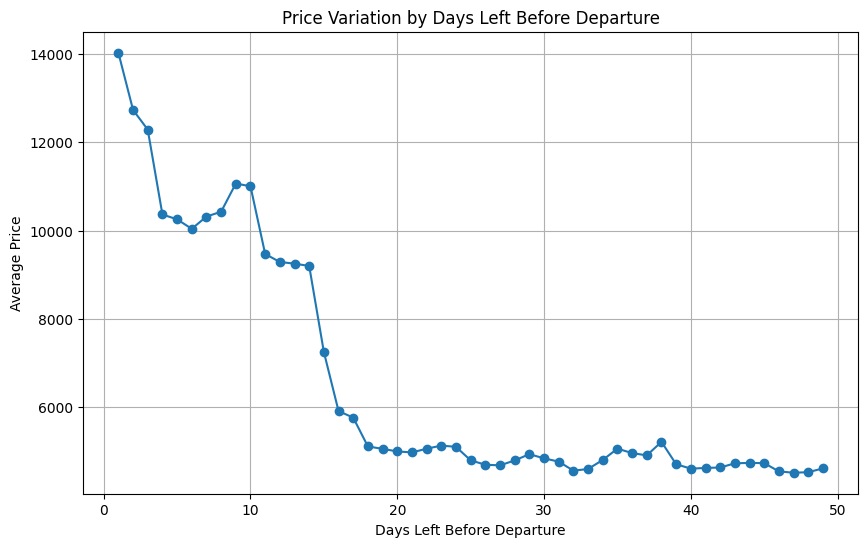

In [ ]:
average_price_by_days_left = df.groupby('days_left')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_price_by_days_left.index, average_price_by_days_left.values, marker='o')
plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.title('Price Variation by Days Left Before Departure')
# plt.grid(True)
plt.show()

#### **8. Giá vé có thay đổi theo thời gian đi và đến không?**

In [ ]:
# data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M').dt.time
# data['Dep_time_minutes'] = data['Dep_Time'].apply(lambda x: x.hour * 60 + x.minute)
# Chuyển đổi thời gian từ giờ sang phút để có thể đưa vào biểu đồ
# Hiển thị 5 hàng đầu tiên sau khi chuyển đổi
#display(data.head())

In [ ]:
# Tách giờ từ cột Arrival_Time
# data['Hour'] = data['Arrival_Time'].str.split(' ').str[0]
# data['Hour'] = pd.to_datetime(data['Hour'], format='%H:%M').dt.time
# data['Arr_time_minutes'] = data['Hour'].apply(lambda x: x.hour * 60 + x.minute)
# Hiển thị 5 hàng đầu tiên sau khi chuyển đổi
#display(data.head())

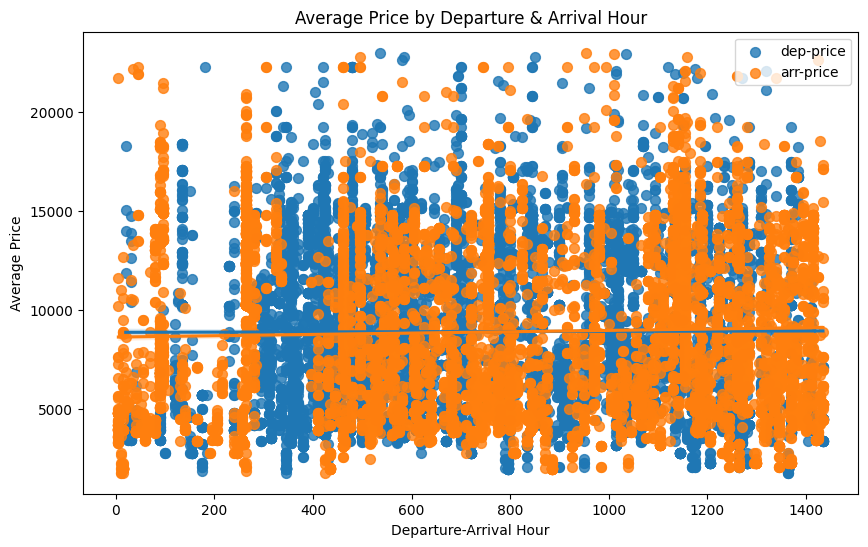

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(x='Dep_time_minutes', y='Price', data=data, scatter_kws={'s': 50}, label='dep-price')
sns.regplot(x='Arr_time_minutes', y='Price', data=data, scatter_kws={'s': 50}, label='arr-price')

plt.title('Average Price by Departure & Arrival Hour')
plt.xlabel('Departure-Arrival Hour')
plt.ylabel('Average Price')
plt.legend()
plt.show()

Có thể thấy từ biều đồ, 2 đường hồi đều song song với trục x, từ đó suy ra giá vé không thay đổi theo thời gian đi và đến

#### **9. Giá thay đổi như thế nào khi thay đổi Nguồn và Điểm đến?**

Destination     Banglore       Cochin        Delhi    Hyderabad      Kolkata  \
Source                                                                         
Banglore             NaN          NaN  5143.918577          NaN          NaN   
Chennai              NaN          NaN          NaN          NaN  4789.892388   
Delhi                NaN  10467.94292          NaN          NaN          NaN   
Kolkata      9152.219436          NaN          NaN          NaN          NaN   
Mumbai               NaN          NaN          NaN  4921.650289          NaN   

Destination     New Delhi  
Source                     
Banglore     10343.231395  
Chennai               NaN  
Delhi                 NaN  
Kolkata               NaN  
Mumbai                NaN  


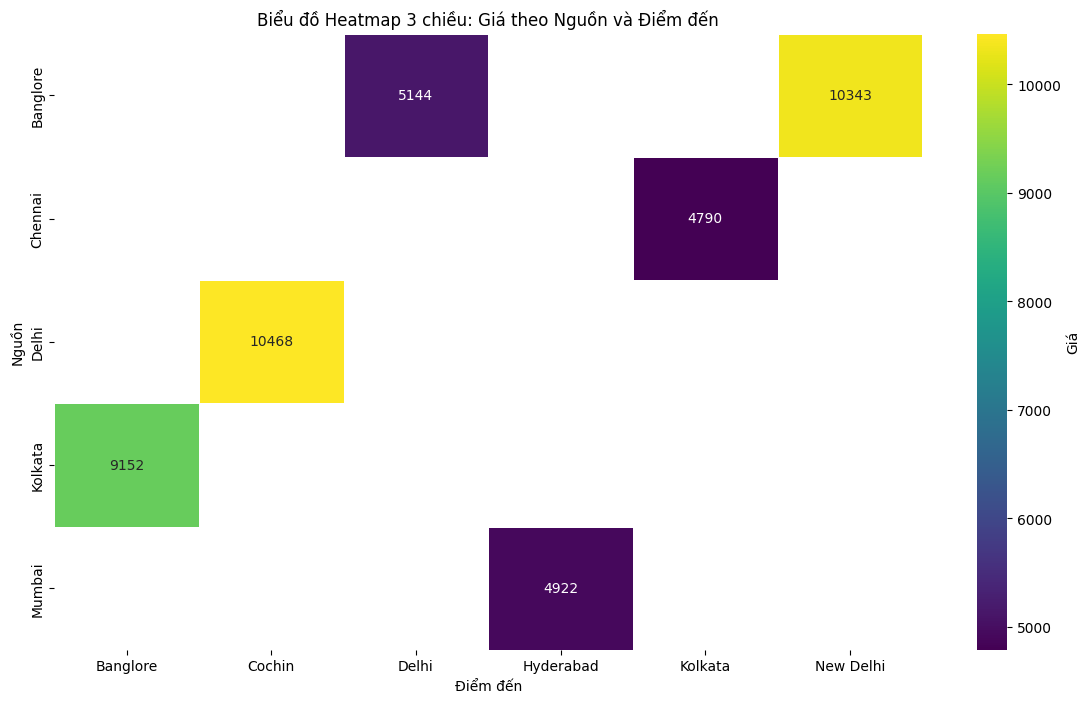

In [ ]:
# Tạo pivot table để chuẩn bị dữ liệu cho heatmap
pivot_data = data.pivot_table(values='Price', index='Source', columns='Destination', aggfunc='mean')
print(pivot_data)

# Vẽ biểu đồ heatmap 3 chiều
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, cmap='viridis', fmt=".0f", cbar_kws={'label': 'Giá'}, linewidths=.5)
plt.title('Biểu đồ Heatmap 3 chiều: Giá theo Nguồn và Điểm đến')
plt.xlabel('Điểm đến')
plt.ylabel('Nguồn')
plt.show()

Qua biểu đồ Heat map ta nhận thấy ở nguồn là Banglore thì khi thay đổi điểm đến là Delhi và New Delhi ta nhận thấy giá vé trung bình ở điểm đến New Delhi cao hơn điểm đến Delhi gấp xấp xỉ 2 lần.

#Kết luận các điểm chính quan sát được từ dữ liệu từ các gợi ý trên

- Tháng cao điểm nhất là tháng 5 với 3466 chuyến bay và tháng 6 với 3414 chuyến bay.
- Giá có thay đổi tuỳ theo hãng hàng không, tuy nhiên phần lớn giá vé sẽ tập trung trong khoảng 900 -  12000 rupee.
- Hãng máy bay được khách đặt vé nhiều nhất là Jet Airways và hãng có có số lượng đặt vé ít nhất là Trujet.

#Các yếu tố nào có khả năng ảnh hưởng đến giá vé chuyến bay?

- **Thời điểm bay**: Thời điểm bay cũng ảnh hưởng đến giá vé máy bay. Thông thường, giá vé máy bay vào các ngày lễ, Tết sẽ cao hơn so với các ngày bình thường.

- **Thời tiết**: Thời tiết xấu có thể làm giá vé máy bay tăng cao hơn so với thời tiết đẹp.

- **Loại vé**: giá vé có sự thay đổi ở hạng ghế (thương gia, phổ thông...)

- **Thời điểm mua vé**: Thời điểm mua vé khác nhau thì giá vé sẽ khác nhau, tùy vào thời điểm vé mua trước ngày bay là thời gian bao lâu


#Dự đoán giá vé

In [ ]:

X = data[["Month_of_Journey","Day_of_Journey","Duration_minutes","Total_Stops"]]
y = data["Price"]

# Thêm một cột hằng (constant) vào đặc trưng X
X1 = sm.add_constant(X)

# Tạo mô hình OLS
model_Ols = sm.OLS(y, X1)
result = model_Ols.fit()
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2452.
Date:                Fri, 05 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:04:27   Log-Likelihood:                -99561.
No. Observations:               10589   AIC:                         1.991e+05
Df Residuals:                   10584   BIC:                         1.992e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7668.4233    135.230  

- R-squared: 0.481 có nghĩa là mô hình hồi quy tuyến tính đã sử dụng có khả năng giải thích được khoảng 48.1% phương sai của biến phụ thuộc.
- F-statistic: Giá trị 2452 với p-value 0.00 cho thấy mô hình có ý nghĩa thống kê cao.
- const: Giá trị 7668.4233 tương ứng với giá vé trung bình khi các biến độc lập khác bằng 0.
- Month_of_Journey: Hệ số -331.3141 cho thấy giá vé trung bình giảm 331,31 tháng bay tăng lên 1 đơn vị.
- Day_of_Journey: Hệ số -56.8747 cho thấy khi ngày tăng thì giá vé có xu hướng giảm
- Duration_minutes: Hệ số 1.3120 cho thấy giá vé trung bình tăng 1,312 cho mỗi phút thời gian bay.
- Total_Stops: Hệ số 3319.1483 cho thấy giá vé trung bình tăng 3319,15 mỗi lần quá cảnh xuống 1 sân bay khác, tức là có thêm điểm dừng thì giá vé sẽ tăng thêm 3319,15 (so với chuyến bay thẳng).
- pvalue xấp xỉ 0 cho thấy các biến độc lập đều có ý nghĩa thống kê với mô hình dự báo
- **Kết luận:**

Mô hình hồi quy tuyến tính này cho thấy một số yếu tố ảnh hưởng đến giá vé máy bay như thời gian bay, thời điểm khởi hành, số lần quá cảnh. Dù dư phân bố không chuẩn nhưng mô hình vẫn có giá trị R-squared và F-statistic cao, cho thấy khả năng giải thích dữ liệu tốt.

Giá vé =7668.4233 + (Month_of_Journey * -331.3141) + (Day_of_Journey * -56.8747) + (Duration_minutes * 1.3120) + (Total_Stops * 3319.1483)

In [ ]:
# Chia tập train và test theo tỉ lệ 2/3 và 1/3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Thực hiện học mô hình Linear Regression từ dữ liệu train
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Áp dụng mô hình đã học được lên tập test để nhận được những giá trị dự báo
y_pred = regressor.predict(X_test)

# Các thông số của mô hình học được và độ đánh giá mô hình R-square
# Intercept
print('Intercept:', regressor.intercept_)

# Coefficients
print('Coefficients: \n', regressor.coef_)

# Mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# Coefficient of determination (R-Square)
print('R-Square: %.2f' % r2_score(y_test, y_pred))

Intercept: 7746.128343868047
Coefficients: 
 [-3.42983677e+02 -5.75393484e+01  1.44200476e+00  3.22805975e+03]
Mean squared error: 8696307.73
R-Square: 0.48
